# Notebook Imports

In [263]:
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# from sklearn.datasets import load_boston



%matplotlib inline

# Gather Data

[Source: This dataset was obtained from the StatLib repository](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)

In [265]:
california_housing_dataset = fetch_california_housing()

In [266]:
type(california_housing_dataset)

sklearn.utils._bunch.Bunch

In [267]:
california_housing_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [268]:
dir(california_housing_dataset)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [269]:
print(california_housing_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Data points and features

In [271]:
type(california_housing_dataset.data)

numpy.ndarray

In [272]:
california_housing_dataset.data.shape  # chaining dot notation

(20640, 8)

In [273]:
california_housing_dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [274]:
# Actual prices in thousands (000s)
california_housing_dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

# Data exploration with Pandas dataframes

In [276]:
# Create a pandas dataframe
data = pd.DataFrame(data=california_housing_dataset.data, columns=california_housing_dataset.feature_names)

# Add column with the price (target)
data['PRICE'] = california_housing_dataset.target

In [277]:
data.head()  # the top rows look like this:

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [278]:
data.tail()  # the bottom of dataframe look like this:

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [279]:
data.count()  # show us the number of row

MedInc        20640
HouseAge      20640
AveRooms      20640
AveBedrms     20640
Population    20640
AveOccup      20640
Latitude      20640
Longitude     20640
PRICE         20640
dtype: int64

## Cleaning data - check for missing values

In [281]:
pd.isnull(data).any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
PRICE         False
dtype: bool

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Visualising Data - Histograms, Distributions and Bar Charts

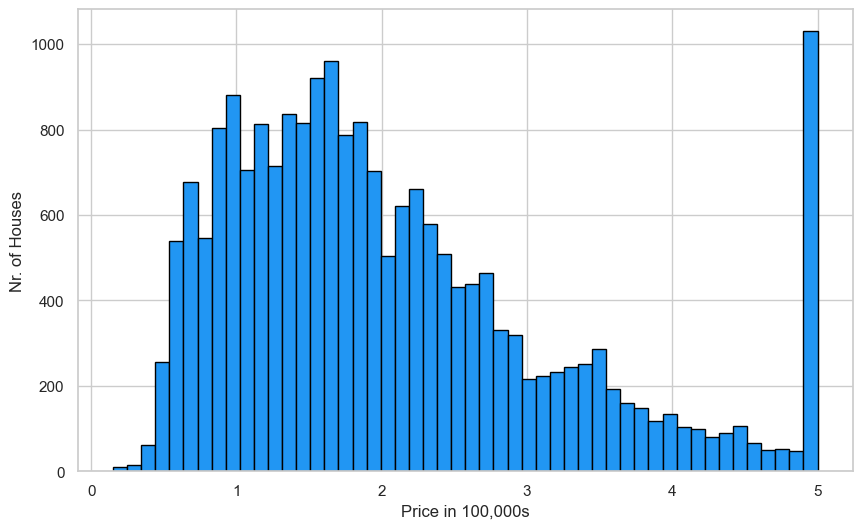

In [284]:
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in 100,000s')
plt.ylabel('Nr. of Houses')
plt.show()

/var/folders/5s/ncty0hh56ws3bz4m0grxb5ph0000gs/T/ipykernel_66635/1723591139.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PRICE'], bins=50, hist=True, kde=False, color='#fbc02d')


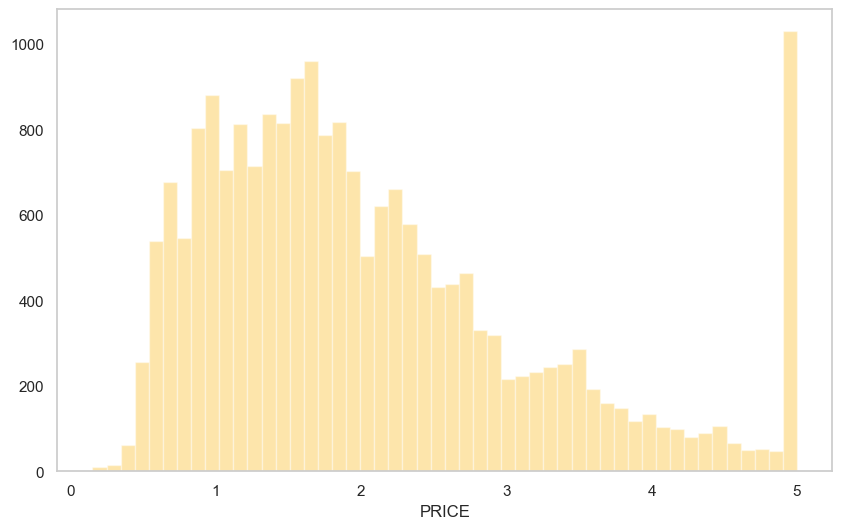

In [285]:
plt.figure(figsize=(10, 6))
plt.grid()
sns.distplot(data['PRICE'], bins=50, hist=True, kde=False, color='#fbc02d')
plt.show()

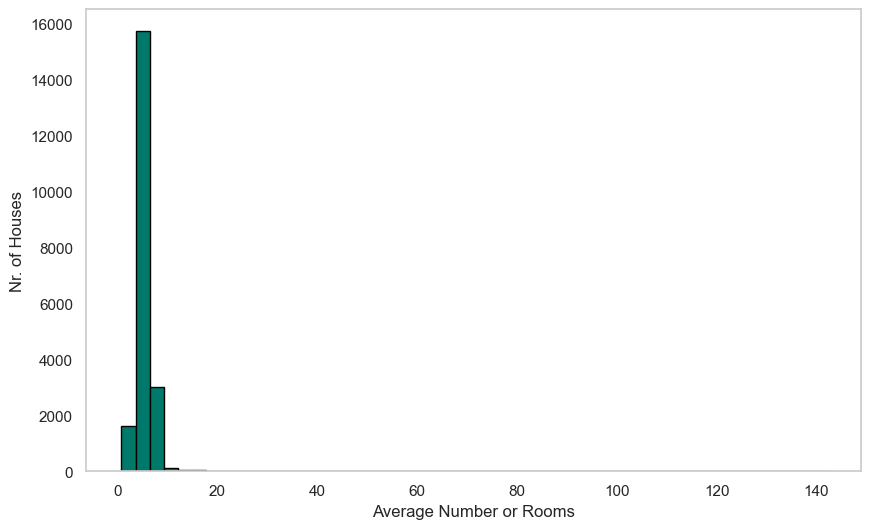

In [286]:
plt.figure(figsize=(10, 6))
plt.hist(data['AveRooms'], bins=50, ec='black', color='#00796b')
plt.grid()

plt.xlabel('Average Number or Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [287]:
data['AveRooms'].mean()

5.428999742190376

In [288]:
data['AveRooms'].value_counts()

AveRooms
5.000000    27
4.500000    22
4.000000    21
6.000000    20
5.333333    13
            ..
3.532286     1
4.793919     1
4.964602     1
4.539088     1
5.254717     1
Name: count, Length: 19392, dtype: int64

## Descriptive Statistics

In [290]:
data['PRICE'].min()*100000

14999.000000000002

In [291]:
data['PRICE'].max()*100000

500000.99999999994

In [292]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Correlation

## $$ \rho _{XY} = corr(X,Y) $$
## $$ -1.0 \leq \rho \leq +1.0 $$

In [294]:
# Calculate the correlation between  property price and Average rooms
data['PRICE'].corr(data['AveRooms'])

0.15194828974145774

In [295]:
data.corr() # Pearson Correlation Coefficients

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
PRICE,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [296]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

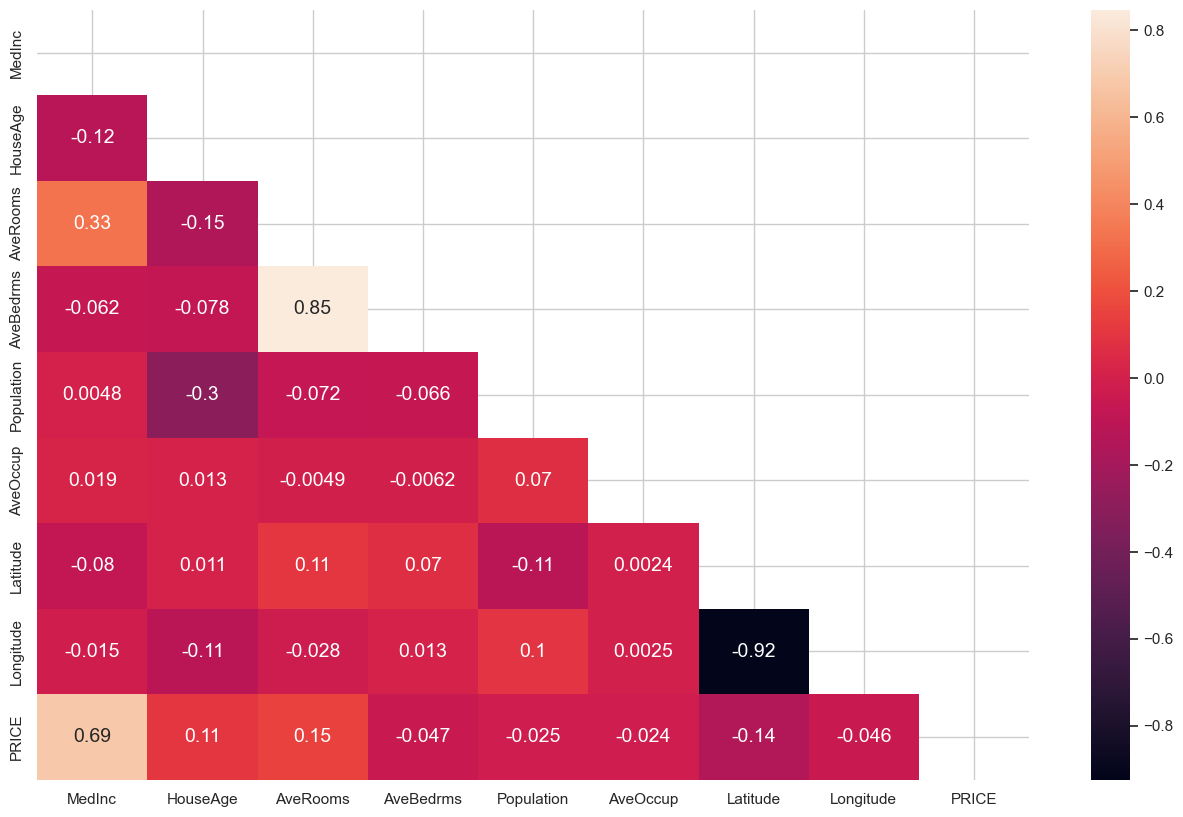

In [297]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
plt.show()

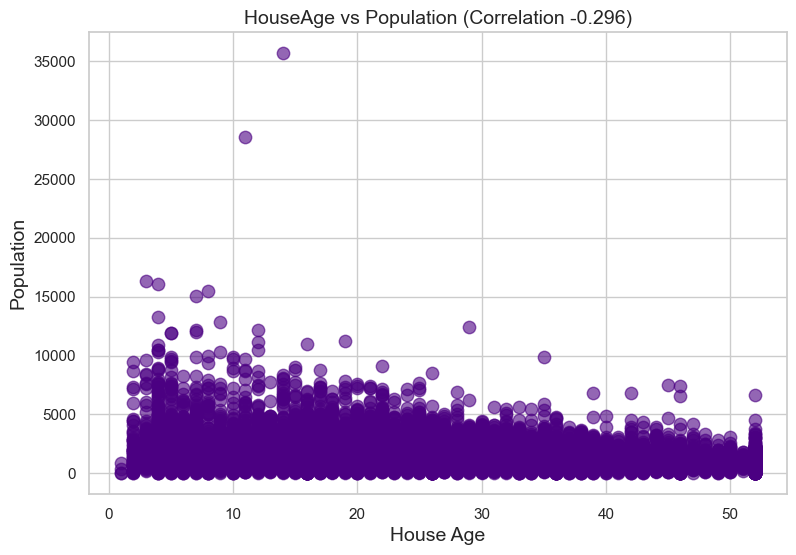

In [298]:
population_house_age_corr = round(data['Population'].corr(data['HouseAge']), 3)

plt.figure(figsize=(9, 6))
plt.scatter(x=data['HouseAge'], y=data['Population'], alpha=0.6, s=80, color='indigo')
plt.title(f'HouseAge vs Population (Correlation {population_house_age_corr})', fontsize=14)
plt.xlabel('House Age', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.show()

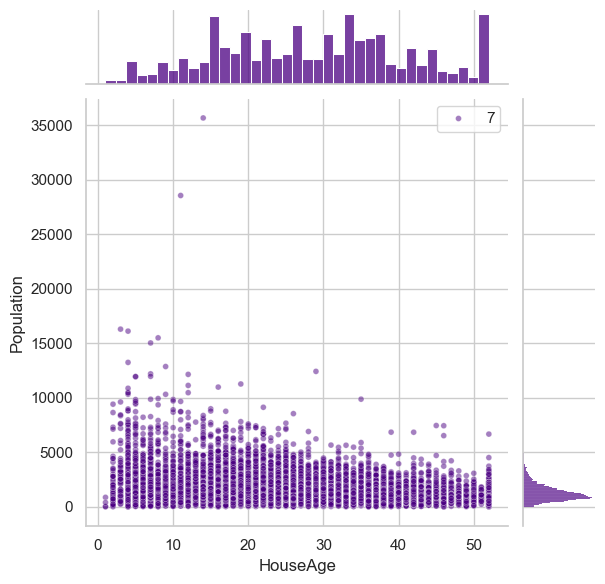

In [299]:
sns.set()
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.jointplot(x=data['HouseAge'], y=data['Population'], size=7, color='indigo', joint_kws={'alpha': 0.5})
plt.show()

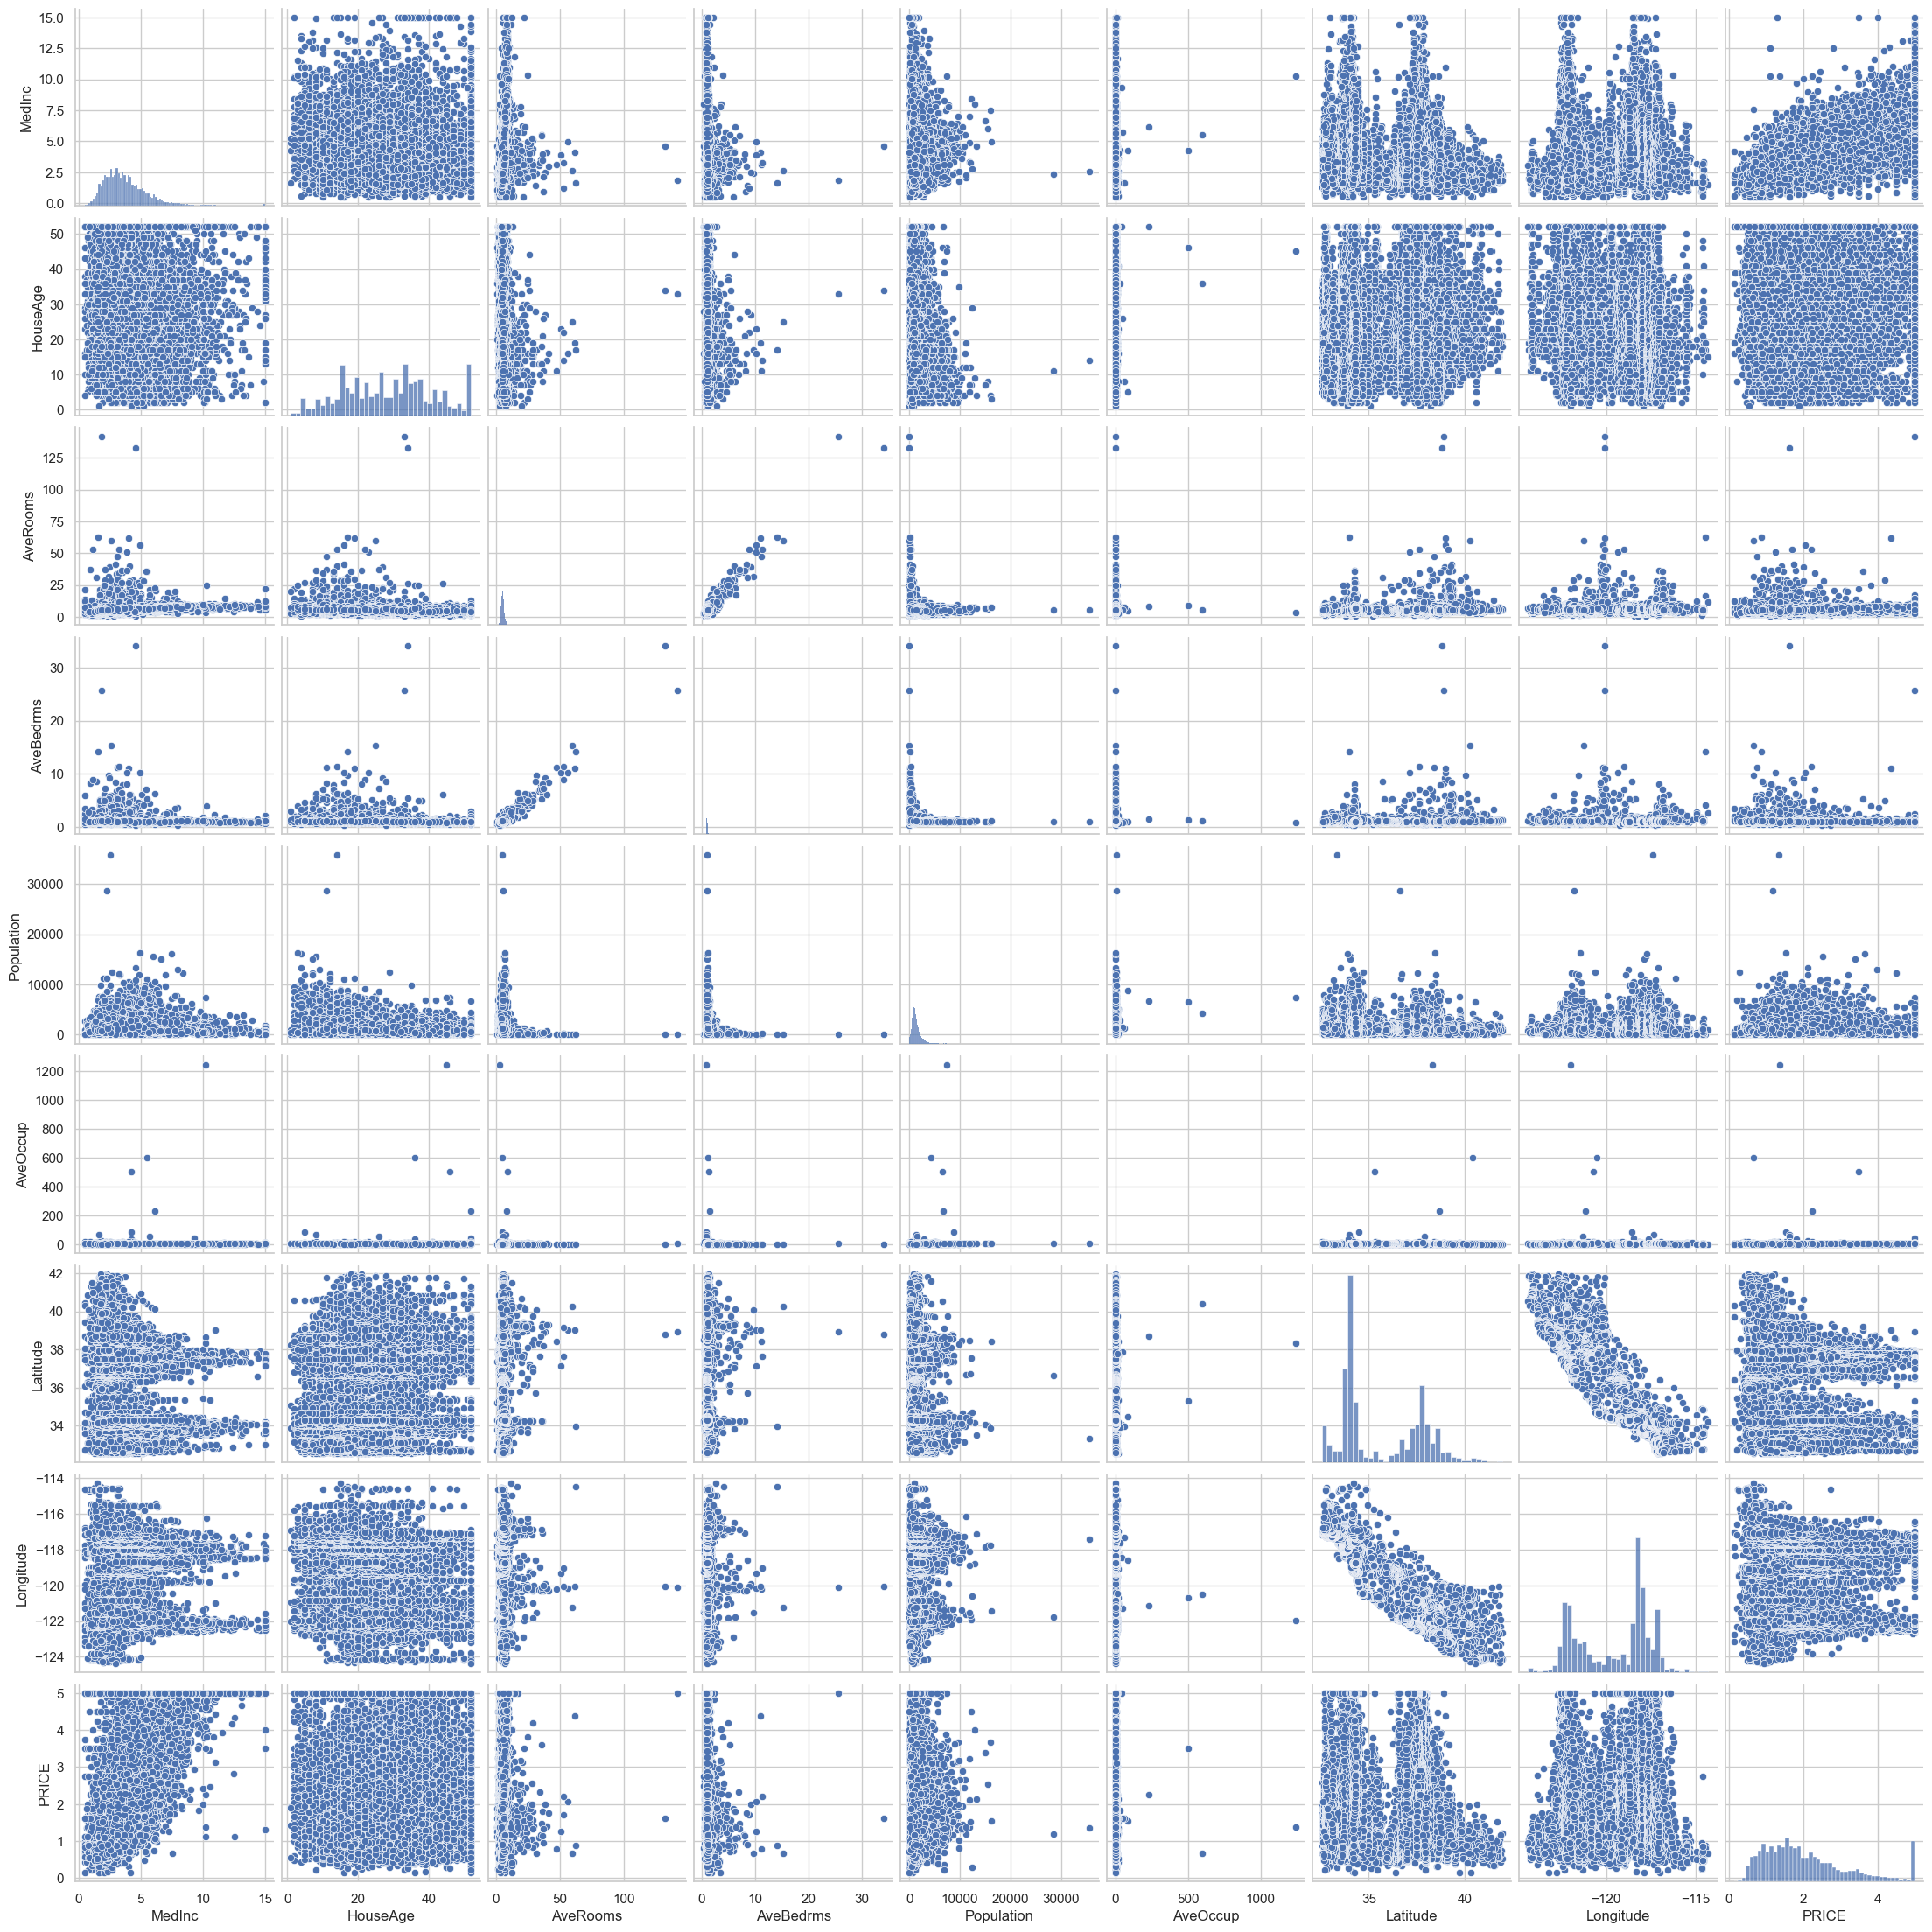

CPU times: user 43.4 s, sys: 2.37 s, total: 45.8 s
Wall time: 48.5 s


In [300]:
%%time

sns.pairplot(data)
plt.show()

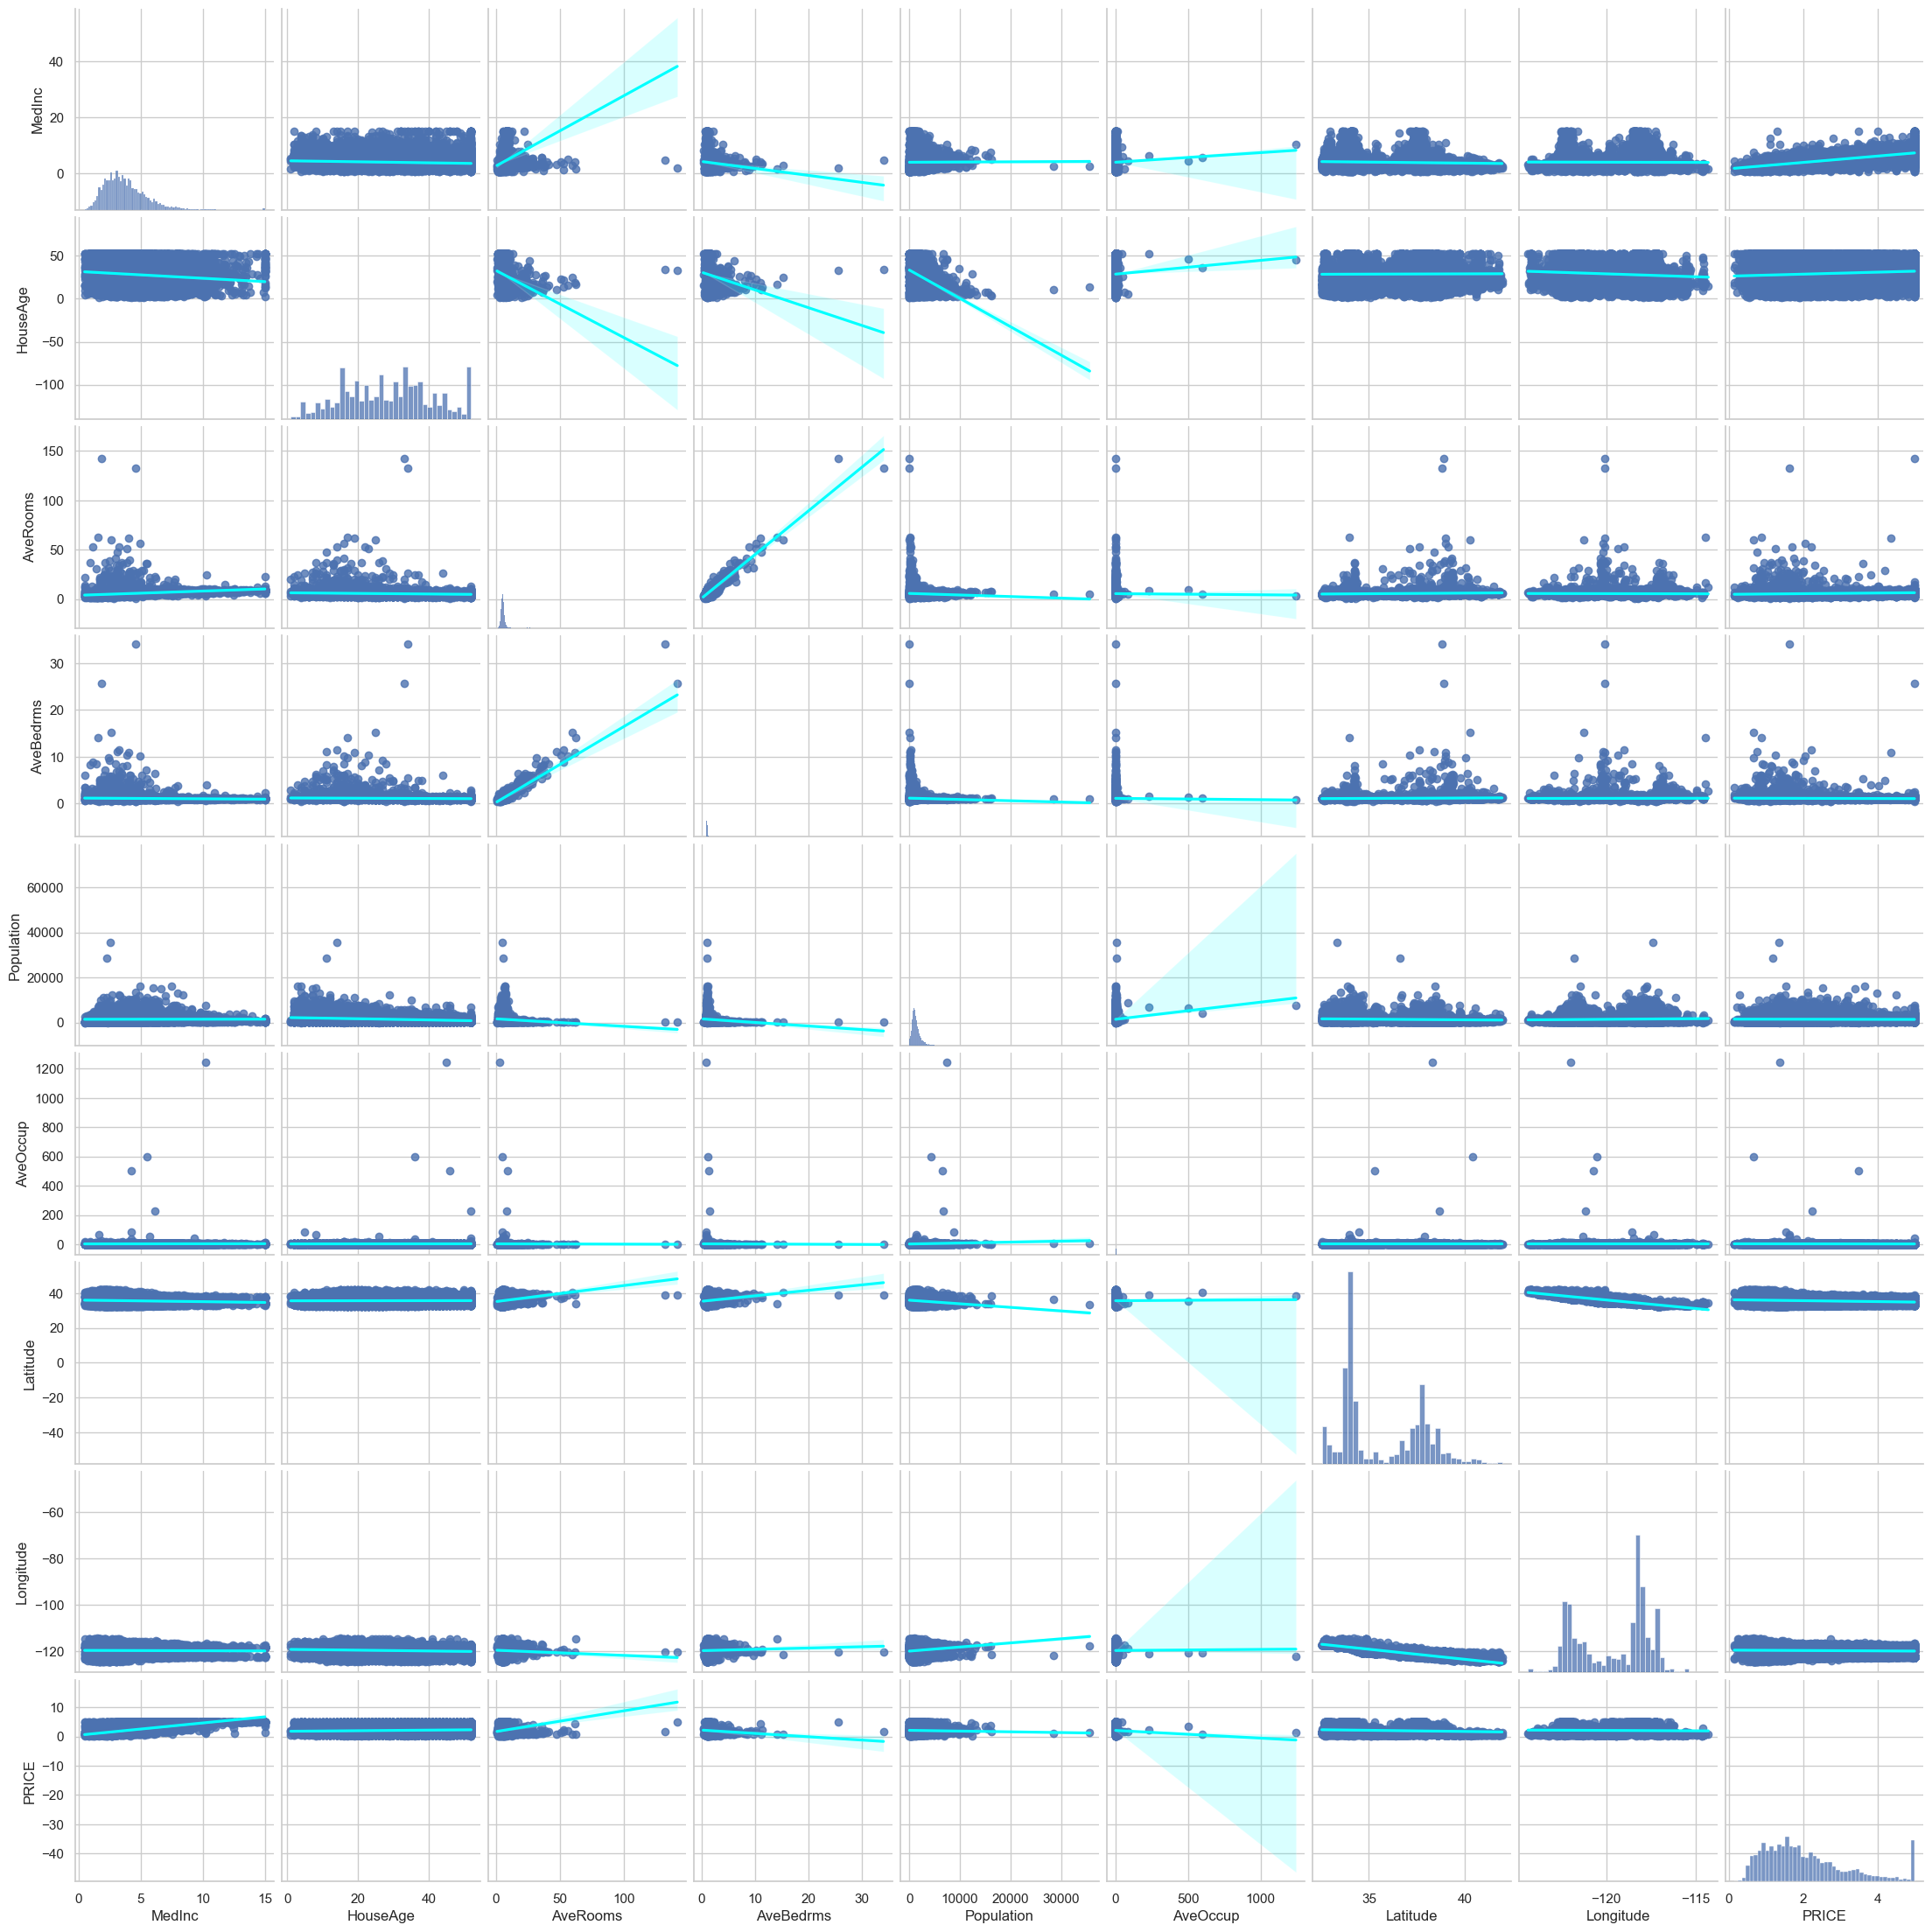

CPU times: user 1min 36s, sys: 1.13 s, total: 1min 37s
Wall time: 1min 39s


In [301]:
%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

## Training & Test Dataset Split

In [303]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# % of training set
len(X_train)/len(features)

0.8

In [304]:
# % of test data set
X_test.shape[0]/features.shape[0]

0.2

## Multivariable Regression

In [306]:
regr = LinearRegression()
regr.fit(X_train, y_train) # (training  features, training target values)

# Challenge: print out r-squared for training and test datasets
print('Training data r-squared: ', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared:  0.6074049305021048
Test data r-squared:  0.6009790143129106
Intercept -37.48696576537289


,coef
MedInc,0.433102
HouseAge,0.009324
AveRooms,-0.100333
AveBedrms,0.615219
Population,-0.000003
AveOccup,-0.004782
Latitude,-0.429077
Longitude,-0.441484


## Data Transformations

In [308]:
data['PRICE'].skew()

0.9777632739098345

In [309]:
y_log = np.log(data['PRICE'])
y_log.tail()

20635   -0.247180
20636   -0.260067
20637   -0.080126
20638   -0.166055
20639   -0.112050
Name: PRICE, dtype: float64

In [310]:
y_log.skew()

-0.17317539032496646

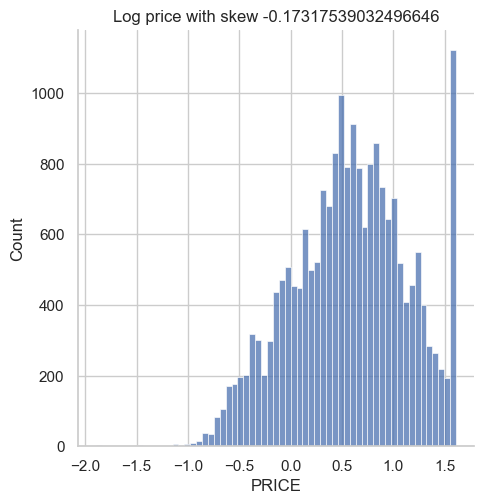

In [311]:
sns.displot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

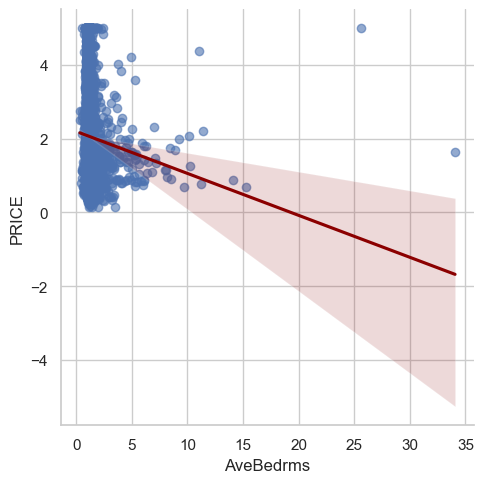

In [312]:
sns.lmplot(x='AveBedrms' , y='PRICE', data=data,
          scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.show()

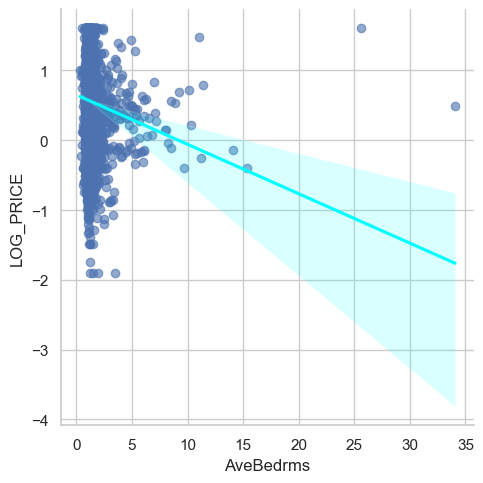

In [313]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='AveBedrms' , y='LOG_PRICE', data=transformed_data,
          scatter_kws={'alpha': 0.6}, line_kws={'color':'cyan'})
plt.show()

## Regression using log prices

In [315]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train) # (training  features, training target values)

print('Training data r-squared: ', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared:  0.6168233836099825
Test data r-squared:  0.6037489256704882
Intercept -24.57049046084645


,coef
MedInc,0.186068
HouseAge,0.002279
AveRooms,-0.030865
AveBedrms,0.224873
Population,0.000008
AveOccup,-0.002259
Latitude,-0.289071
Longitude,-0.289146


## p values & Evaluating Coefficients

In [317]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# results.params
# results.pvalues

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

,coef,p-value
const,-24.570490,0.000
MedInc,0.186068,0.000
HouseAge,0.002279,0.000
AveRooms,-0.030865,0.000
AveBedrms,0.224873,0.000
Population,0.000008,0.001
AveOccup,-0.002259,0.000
Latitude,-0.289071,0.000
Longitude,-0.289146,0.000


## Testing for Multicollinearity

$$ AveOccup = \alpha _0 + \alpha _1 MedInc + \alpha _2 HouseAge + ... + \alpha _{7}Longitude  $$

$$ VIF = _{AveOccup} = \frac{1}{1 - R _{AveOccup} ^ 2} $$

In [319]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

2.4741199441522226

In [320]:
# Challenge: print out the number of columns in x_inc_const
len(X_incl_const.columns)
X_incl_const.shape[1]

9

In [321]:
# Challegue: write a for loop that prints out all the VIFs for all features
for i in range(X_incl_const.shape[1]):
    print(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print('All done!')

17168.64639900052
2.4741199441522226
1.2407811031054883
8.87237661435907
7.538102860339467
1.1355969367025918
1.008730363827167
9.383400327454687
9.043759092819359
All done!


In [322]:
vif = [] # empty list
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print(vif)

[17168.64639900052, 2.4741199441522226, 1.2407811031054883, 8.87237661435907, 7.538102860339467, 1.1355969367025918, 1.008730363827167, 9.383400327454687, 9.043759092819359]


In [323]:
vif = [variance_inflation_factor(exog=X_incl_const.values,
                                 exog_idx=i) for i in range(X_incl_const.shape[1])] 
pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.around(vif, 2)})

,coef_name,vif
0,const,17168.65
1,MedInc,2.47
2,HouseAge,1.24
3,AveRooms,8.87
4,AveBedrms,7.54
5,Population,1.14
6,AveOccup,1.01
7,Latitude,9.38
8,Longitude,9.04


## Model Simplification & the BIC

In [325]:
# Original model with Population

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 12467.657146183048
r-squared is 0.6168233836099826


In [326]:
# Reduced model #2 excluding Population

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['Population'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_population = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 12468.129145519348
r-squared is 0.616586985007727


In [327]:
# Reduced model #3 excluding Population and HouseAge

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['Population', 'HouseAge'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 12536.922645575174
r-squared is 0.6147597298018252


In [328]:
frames = [org_coef, coef_minus_population, reduced_coef]
pd.concat(frames, axis=1)

,coef,p-value,coef,p-value,coef,p-value
const,-24.570490,0.000,-24.622731,0.0,-25.430411,0.0
MedInc,0.186068,0.000,0.185910,0.0,0.183795,0.0
HouseAge,0.002279,0.000,0.002034,0.0,NaN,NaN
AveRooms,-0.030865,0.000,-0.031243,0.0,-0.032061,0.0
AveBedrms,0.224873,0.000,0.225282,0.0,0.227579,0.0
Population,0.000008,0.001,NaN,NaN,NaN,NaN
AveOccup,-0.002259,0.000,-0.002142,0.0,-0.002058,0.0
Latitude,-0.289071,0.000,-0.290347,0.0,-0.298892,0.0
Longitude,-0.289146,0.000,-0.290135,0.0,-0.300005,0.0


## Residuals & Residual Plots

<>:22: SyntaxWarning: invalid escape sequence '\h'
<>:23: SyntaxWarning: invalid escape sequence '\h'
<>:31: SyntaxWarning: invalid escape sequence '\h'
<>:32: SyntaxWarning: invalid escape sequence '\h'
<>:40: SyntaxWarning: invalid escape sequence '\h'
<>:22: SyntaxWarning: invalid escape sequence '\h'
<>:23: SyntaxWarning: invalid escape sequence '\h'
<>:31: SyntaxWarning: invalid escape sequence '\h'
<>:32: SyntaxWarning: invalid escape sequence '\h'
<>:40: SyntaxWarning: invalid escape sequence '\h'
/var/folders/5s/ncty0hh56ws3bz4m0grxb5ph0000gs/T/ipykernel_66635/3624273024.py:22: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
/var/folders/5s/ncty0hh56ws3bz4m0grxb5ph0000gs/T/ipykernel_66635/3624273024.py:23: SyntaxWarning: invalid escape sequence '\h'
  plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
/var/folders/5s/ncty0hh56ws3bz4m0grxb5ph0000gs/T/ipykernel_66635/3624273024.py

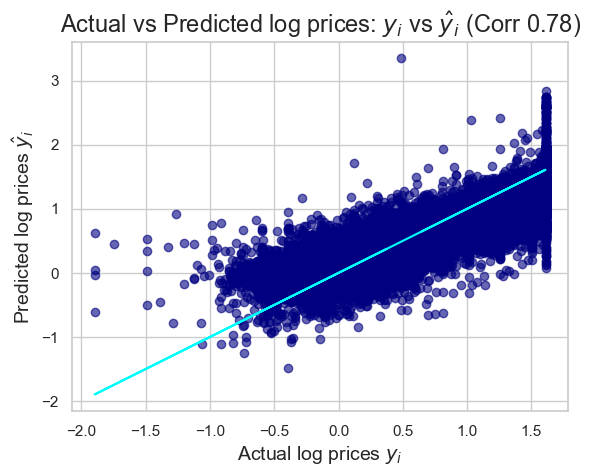

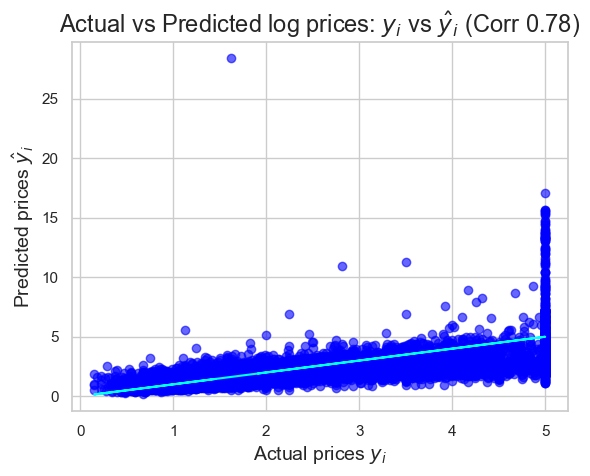

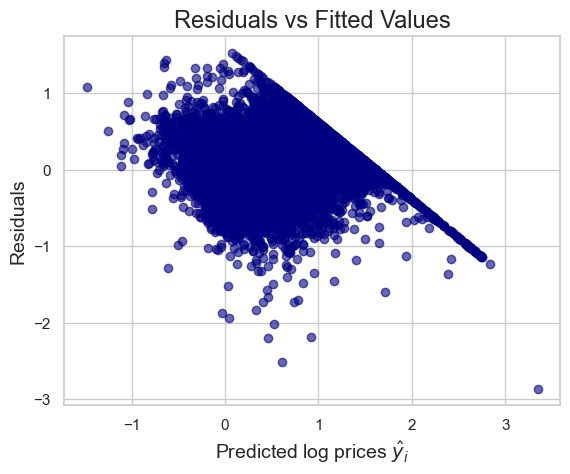

In [330]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(data['PRICE']) # Use log prices
features = data.drop(['PRICE', 'Population', 'HouseAge'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuls = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs Predicted prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices $y _i$', fontsize=14)
plt.ylabel('Predicted prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()